# Regression models on Gardiner Expy flow dataset

In [1]:
import ml_help
import pandas as pd
from sklearn.model_selection import train_test_split
plot_label="Speed (km/h)"

## Start by manipulating data

- Import data

In [2]:
df = pd.read_csv("./data/gardiner_flow.csv.zip")
df.head(3)

,collectedAt,month,day,day_of_week,hour,minute,currentSpeed
0,2022-07-14 12:45:00+00:00,July,14,Thursday,12,45,94
1,2022-07-14 12:51:44+00:00,July,14,Thursday,12,51,94
2,2022-07-14 12:55:27+00:00,July,14,Thursday,12,55,75


- Remove column "collectedAt" because it is not needed at this moment
- Removing day because day and day of week may conflict (May 17 2023 is Wed, May 17 2022 was Tue)

In [3]:
df.drop(["collectedAt"],axis=1,inplace=True)
df.head(3)

,month,day,day_of_week,hour,minute,currentSpeed
0,July,14,Thursday,12,45,94
1,July,14,Thursday,12,51,94
2,July,14,Thursday,12,55,75


## Begin ML tasks
- Let us first study the influence of time period in the speed
- y: target (current speed)
- X: features

No need to manually normalize the target because I will use StandardScaler

## Onehot encode categorical features

In [4]:
categorical_feats = ["month","day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_feats)
transformed_df = transformed_df.astype("float32")
transformed_df.head(3)

,day,hour,minute,currentSpeed,month_August,month_December,month_February,month_January,month_July,month_March,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,14.0,12.0,45.0,94.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14.0,12.0,51.0,94.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.0,12.0,55.0,75.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Split into train, validation and test
- Train set is used to train the model
- Validation set is used on hyper-parameter tuning
- Test set is used to validate the model (we use CV here)

In [5]:
X = transformed_df.drop("currentSpeed",axis=1)
y = transformed_df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [6]:
X_val.sort_index()

,day,hour,minute,month_August,month_December,month_February,month_January,month_July,month_March,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,14.0,12.0,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14.0,12.0,51.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,14.0,13.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13,14.0,13.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,14.0,14.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73511,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73515,26.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73528,26.0,21.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73529,26.0,21.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## LinearSVR
- Can't use Epsilon-Support Vector Regression because it doesn't scale well for large sets
- SKlearn docs say the "limit" is couple of 10Ks of data points and my set has 70K+
- Because of this limitation, I'm starting out with LinearSVR
- SKLearn docs suggest dual = False when N-samples > N-features

Steps:
1) Create the regressor itself
2) Use the regressor and the data with K-fold cross-validation (K=10)

### Train and get test metrics

Model found! Predicting...
Model found! Predicting... OK


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(LinearRegression(),
                model        r2       mae         mse      rmse      mape  \
 0  Linear Regression  0.326866  7.946688  110.129074  10.49424  0.107932   
 
    time_to_fit  time_to_predict  
 0     0.021839         0.003812  )

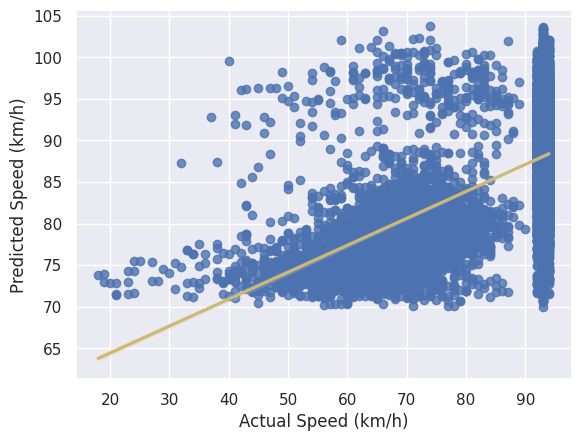

In [7]:
from sklearn.linear_model import LinearRegression

file_name = "001_linear_regression"
model_name = "Linear Regression"

ml_help.train_and_test(file_name, model_name, LinearRegression(), X_train, X_val, y_train, y_val, plot_label)

## Logistic Regression

Model found! Predicting...
Model found! Predicting... OK


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(LogisticRegression(),
                  model        r2       mae       mse       rmse      mape  \
 0  Logistic Regression -0.276799  6.965119  208.8925  14.453114  0.115319   
 
    time_to_fit  time_to_predict  
 0     8.341026         0.008929  )

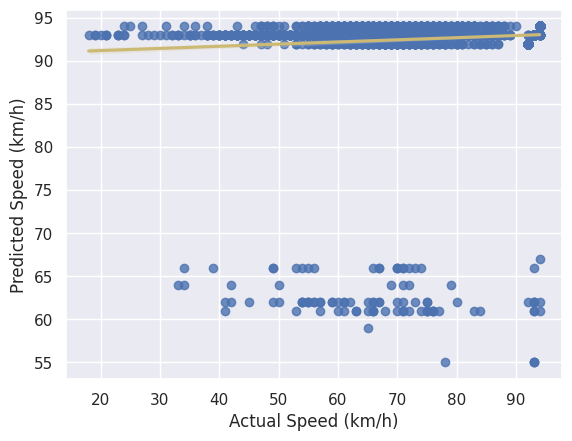

In [8]:
from sklearn.linear_model import LogisticRegression

file_name = "001_logistic_regression"
model_name = "Logistic Regression"

ml_help.train_and_test(file_name, model_name, LogisticRegression(), X_train, X_val, y_train, y_val, plot_label)

## Lasso

Model found! Predicting...
Model found! Predicting... OK


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(Lasso(),
    model        r2       mae        mse      rmse      mape  time_to_fit  \
 0  Lasso  0.292887  8.025448  115.68831  10.75585  0.110912     0.014949   
 
    time_to_predict  
 0         0.002579  )

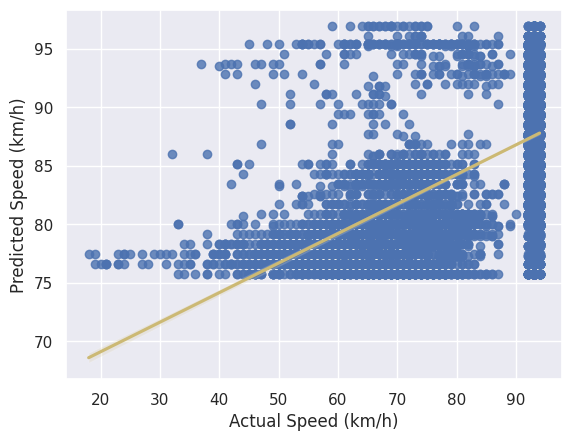

In [9]:
from sklearn.linear_model import Lasso

file_name = "001_lasso"
model_name = "Lasso"

ml_help.train_and_test(file_name, model_name, Lasso(), X_train, X_val, y_train, y_val, plot_label)

## Elastic Net

Model found! Predicting...
Model found! Predicting... OK


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(ElasticNet(),
          model        r2       mae        mse       rmse      mape  \
 0  Elastic Net  0.266358  8.351267  120.02861  10.955757  0.116191   
 
    time_to_fit  time_to_predict  
 0     0.014368          0.00253  )

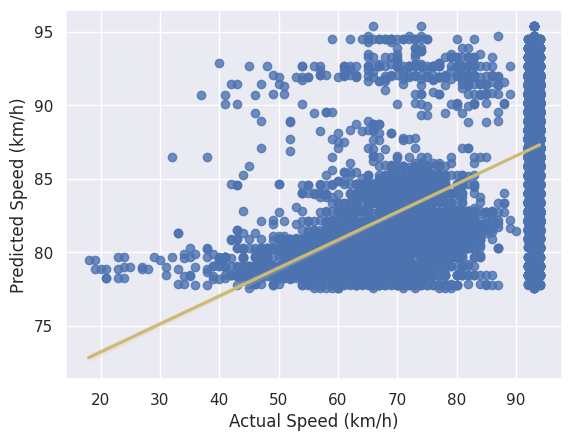

In [10]:
from sklearn.linear_model import ElasticNet

file_name = "001_elastic_net"
model_name = "Elastic Net"

ml_help.train_and_test(file_name, model_name, ElasticNet(), X_train, X_val, y_train, y_val, plot_label)

## Random Forest

Model found! Predicting...
Model found! Predicting... OK


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(RandomForestRegressor(),
            model        r2       mae        mse      rmse      mape  \
 0  Random Forest  0.913182  1.727339  14.203959  3.768814  0.023677   
 
    time_to_fit  time_to_predict  
 0     6.775036         0.203156  )

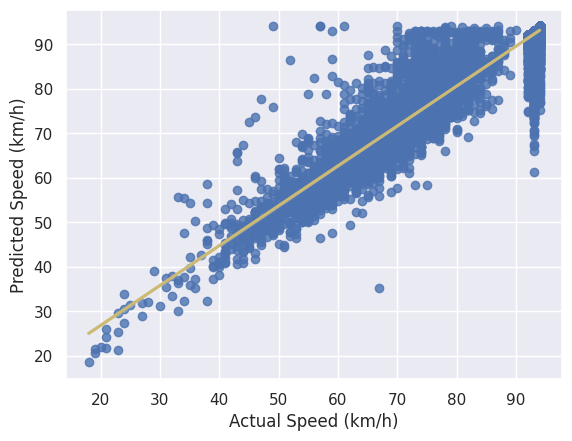

In [11]:
from sklearn.ensemble import RandomForestRegressor

file_name = "001_random_forest"
model_name = "Random Forest"

ml_help.train_and_test(file_name, model_name, RandomForestRegressor(), X_train, X_val, y_train, y_val, plot_label)

## Decision Tree

Model found! Predicting...
Model found! Predicting... OK


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(DecisionTreeRegressor(),
            model        r2       mae       mse     rmse      mape  \
 0  Decision Tree  0.855916  1.732576  23.57306  4.85521  0.024202   
 
    time_to_fit  time_to_predict  
 0     0.107992         0.003676  )

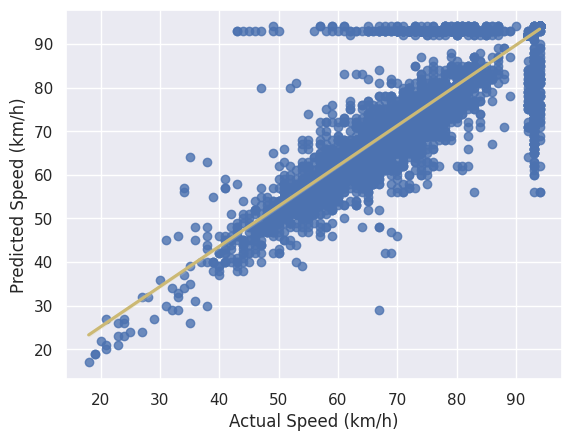

In [12]:
from sklearn.tree import DecisionTreeRegressor

file_name = "001_decision_tree"
model_name = "Decision Tree"

ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(), X_train, X_val, y_train, y_val, plot_label)

## XGBoost

Model NOT found!
Fitting model...
Fitting model... OK! Took 0.6147663593292236 seconds

model XGBoost
r2 0.8442767468182886
mae 2.944647
mse 25.477327
rmse 5.047507
mape 0.039774865
time_to_fit 0.6147663593292236
time_to_predict 0.006643056869506836

Dumping model...
Dumping model... OK! Took 0.04527616500854492 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 {'model': 'XGBoost',
  'r2': 0.8442767468182886,
  'mae': 2.944647,
  'mse': 25.477327,
  'rmse': 5.047507,
  'mape': 0.039774865,
  'time_to_fit': 0.6147663593292236,
  'time_to_predict': 0.006643056869506836})

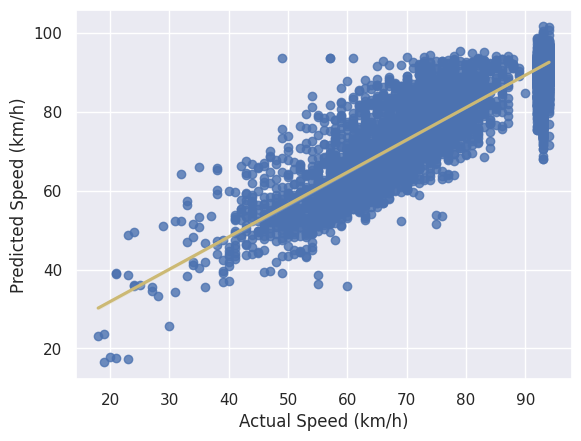

In [14]:
import xgboost as xgb

file_name = "001_xgboost"
model_name = "XGBoost"

xgb_params = {"objective": "reg:squarederror", "tree_method": "hist"}

ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**xgb_params), X_train, X_val, y_train, y_val, plot_label)

## Multi-layer Perceptron

Model NOT found!
Fitting model...


/home/uncle_opal/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 44.92041873931885 seconds

model MLP
r2 0.6784880396589383
mae 4.697368
mse 52.601433
rmse 7.2526846
mape 0.06378267
time_to_fit 44.92041873931885
time_to_predict 0.008267641067504883

Dumping model...
Dumping model... OK! Took 0.00923919677734375 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(MLPRegressor(),
 {'model': 'MLP',
  'r2': 0.6784880396589383,
  'mae': 4.697368,
  'mse': 52.601433,
  'rmse': 7.2526846,
  'mape': 0.06378267,
  'time_to_fit': 44.92041873931885,
  'time_to_predict': 0.008267641067504883})

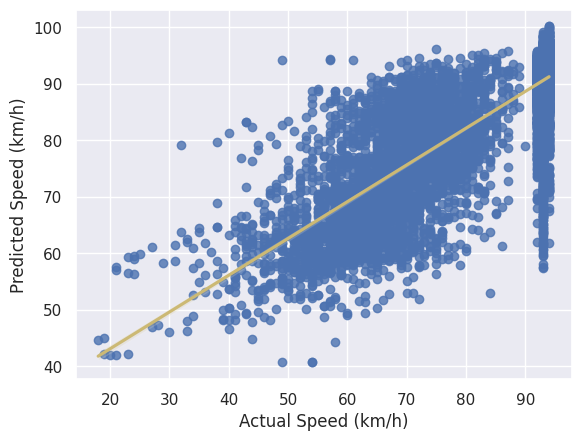

In [15]:
from sklearn.neural_network import MLPRegressor

file_name = "001_mlpr"
model_name = "MLP"

ml_help.train_and_test(file_name, model_name, MLPRegressor(), X_train, X_val, y_train, y_val, plot_label)